***FCIM.FIA - Fundamentals of Artificial Intelligence***

> **Lab 4:** *Learning*
> 
> **Performed by:** *Alexandra Konjevic*, group *FAF-213*
> 
> **Verified by:** Elena Graur, asist. univ.

## Task 1. Import the provided data. Make a detailed dataset analysis and present some statistics in the form of Matplotlib or Seaborn visualisations. Pre-process the data if necessary

In the section below, I used pandas to import the data from the provided CSV file. I then used the `head()` method to display the first 5 rows of the dataset. I also used the `info()` method to display the data types of each column and the number of non-null values. I then used the `describe()` method to display some statistics about the dataset.

I added an additional print of the number of missing values in each column to see if there are any missing values in the dataset.

In [3]:
import pandas as pd
from termcolor import colored
# Load the dataset
df = pd.read_csv('data.csv')

numeric_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(colored('Data Exploration', 'green'))
print(colored('Examine the first few rows of the dataset', 'blue'))
print(df.head())
print()

# Get information about data types and missing values
print(colored('Data types and missing values', 'blue'))
print(df.info())
print()

# Statistical summary of numerical columns
print(colored('Statistical summary of numerical columns', 'blue'))
print(df.describe())
print()

# Check for missing values
print(colored('Check for missing values', 'blue'))
print(df.isnull().sum())

# Unique values in the dataset
print(colored('Unique values in the dataset', 'blue'))
print(df.nunique())


/tmp/ipykernel_8757/2952226410.py:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


Data Exploration
Examine the first few rows of the dataset
   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  

In [4]:
# Fill missing values with mean
# df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())
# df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].mean())
# df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].mean())
# df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean())
# df['Notes'] = df['Notes'].fillna(0)
# Drop the Status column
# df.drop(columns=['Status'], inplace=True)


In the section below, I used `matplotlib` to create the histograms of some of the numerical columns in the dataset (using the `hist()` method). The diagrams provided correspond to the columns `BasePay`, `OvertimePay`, `OtherPay` and `TotalPayBenefits`.

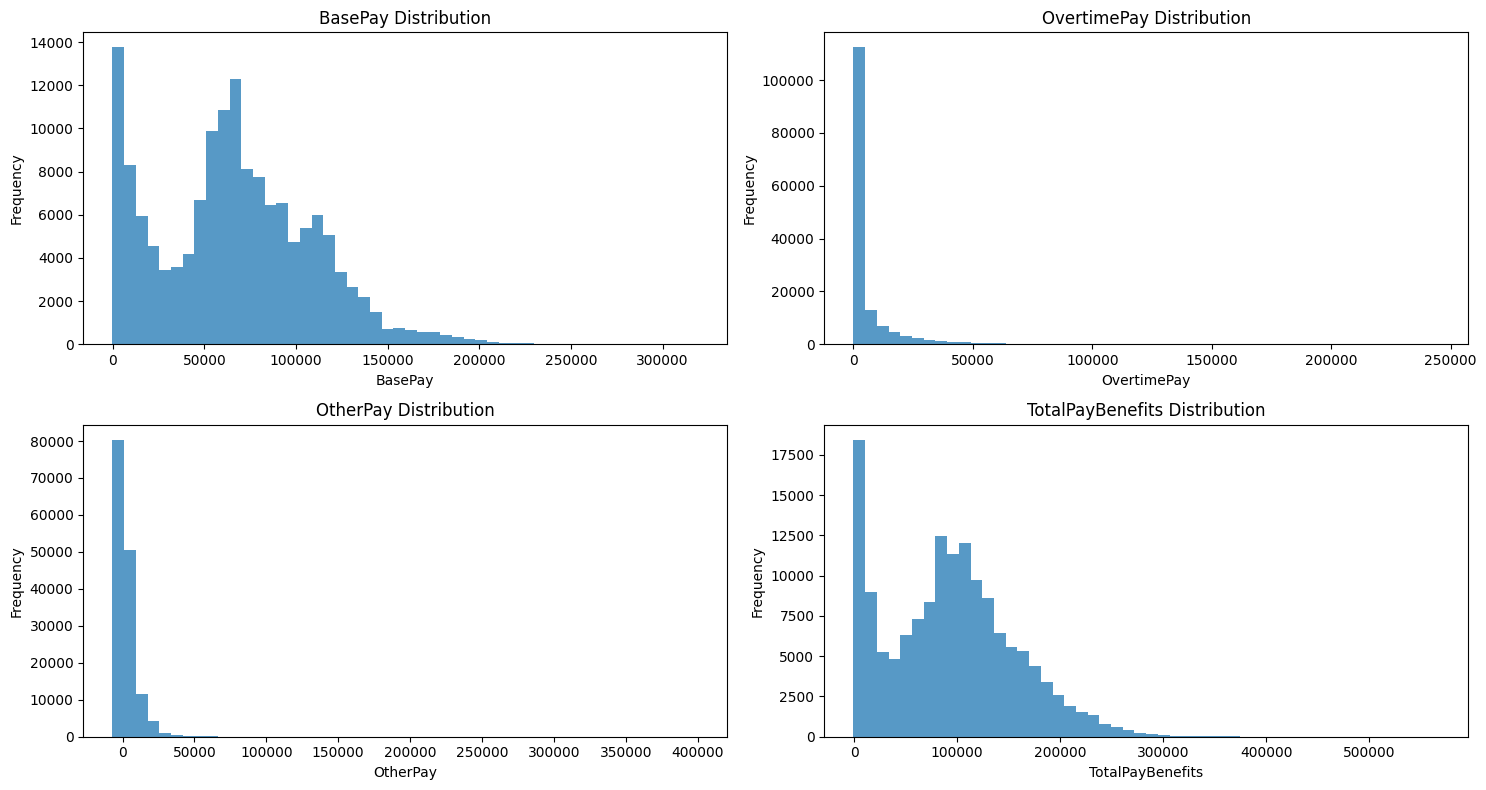

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

diagrams = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPayBenefits']

for i, col in enumerate(diagrams):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col].dropna(), bins=50, alpha=0.75)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Task 2. Based on the analysis from task 1, perform Feature Selection. You should state which columns you will be using for the final predictions and show why you are choosing the respective columns. Perform Linear Regression on your train set, using the selected features.

Feature selection represents the process of isolating the most consistent, non-redundant and relevant features for a model construction. This is done to improve the model's performance and to reduce the computational cost of training the model.

The chosen target variable is `TotalPay`, and to choose the features that will be used for the final predictions, I will use the correlation matrix. The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one of them.

After analyzing data from the Task 1, I decided to drop the columns `Notes`, because all the values are null, and `Status`, because 74% of the values are null.

Also, the `Agency` column has only one unique value, so it will not be useful for the model, because it will not provide any information and will not help the model to make predictions.

Correlation matrix


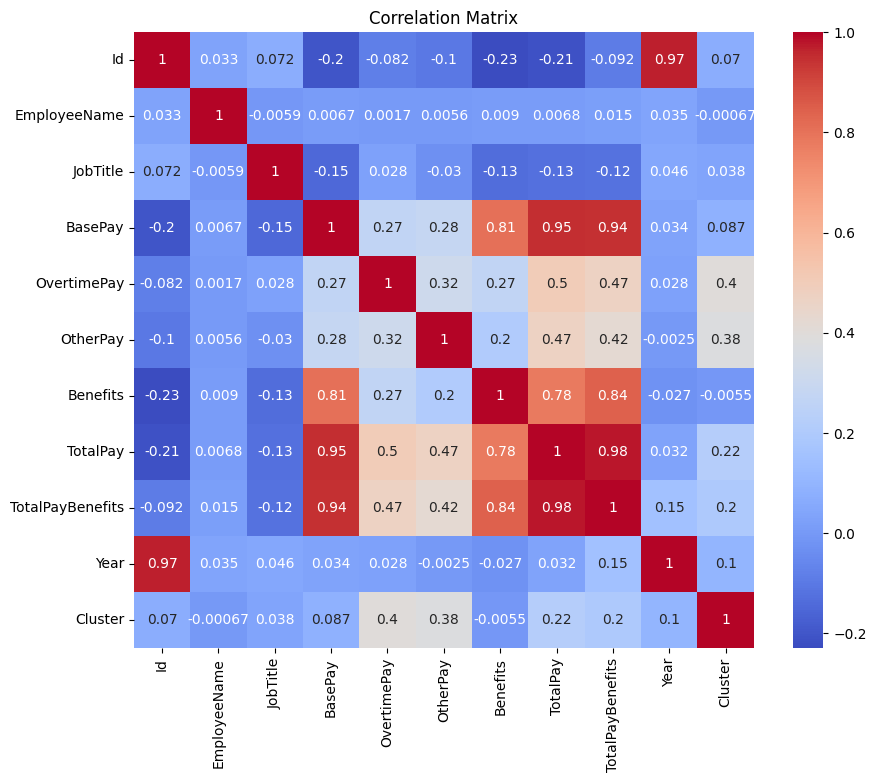

<Axes: >

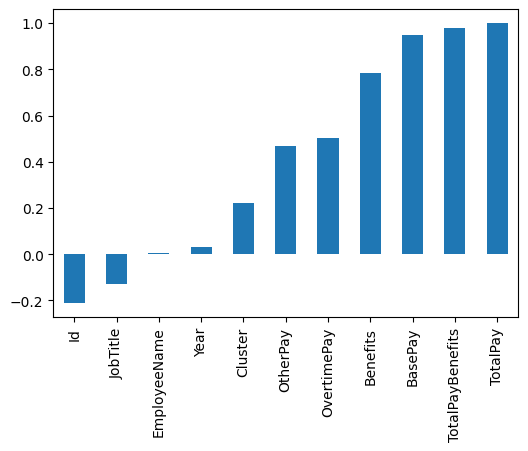

In [11]:
# If there is field Status, drop it
if 'Status' in df.columns:
    df.drop(columns=['Status'], inplace=True)

# If there is field Notes, drop it
if 'Notes' in df.columns:
    df.drop(columns=['Notes'], inplace=True)

    # If there is field Status, drop it
if 'Agency' in df.columns:
    df.drop(columns=['Agency'], inplace=True)

# Fill missing values with mean
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].mean())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].mean())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean())

# Convert string columns to numerical
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

string_columns = ['JobTitle', 'EmployeeName', 'Year']
for col in string_columns:
    df[col] = le.fit_transform(df[col])


# Calculate correlation matrix ignore id column
corr_matrix = df.corr()
print(colored('Correlation matrix', 'blue'))

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

target = 'TotalPay'

# Correlation of features with the target
plt.figure(figsize=(6, 4))
df.corr()[target].sort_values().plot(kind='bar')

Linear regression model is an algorithm that provides a linear relationship between the dependent variable and the independent variable.

In the section below, I used the LinearRegression class from the scikit-learn library to train the model. I used the independent variables `JobTitle`, `OtherPay`, `OvertimePay`, `Benefits`, `BasePay` and `TotalPayBenefits` to train the model. The dependent variable is `TotalPay`.

I split the dataset into training and testing sets using the `train_test_split()` method from the scikit-learn library. I used 80% of the data for training and 20% for testing:
- X_train: Features used to train the model.
- X_test: Features used to test the model.
- y_train: Target values corresponding to X_train.
- y_test: Target values corresponding to X_test.

After that, the model is trained using the `fit()` method, with `X_train` and `y_train` as parameters. The model is then used to make predictions on the test set using the `predict()` method, on the `X_test` dataset.

Then, the `plt.scatter(y_test, y_pred, alpha=0.3, s=5)` method is used to create a scatter plot of the actual values (`y_test`) and the predicted values (`y_pred`).

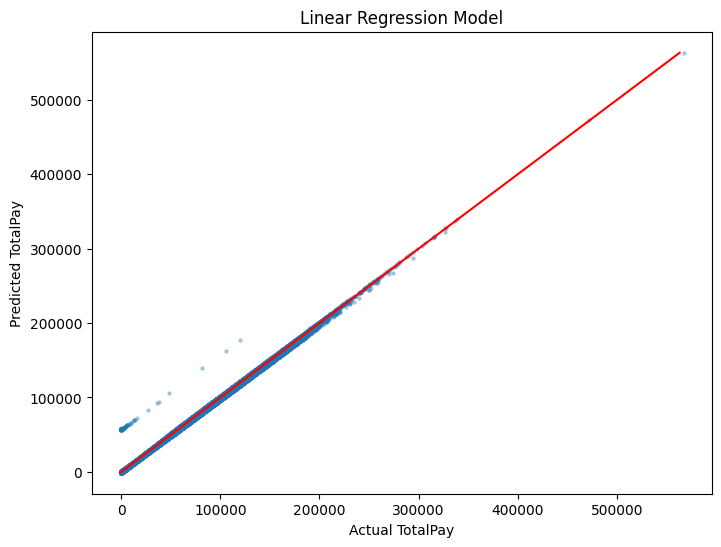

In [16]:
from sklearn.model_selection import train_test_split

X = df[['JobTitle', 'OtherPay', 'OvertimePay', 'Benefits', 'BasePay', 'TotalPayBenefits']]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, s=5)
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.title('Linear Regression Model')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red')

## Task 3. Train at least two new Linear Regression models. You can use one of the following: Ridge, Lasso, Elastic Net Regularization, Ordinary Least Squares, Least-angle Regression (LAR).

For this task I used the Ridge and Lasso regression models:
- Ridge regression is a regularization technique that uses L2 regularization to prevent overfitting. It adds a penalty term to the cost function that is proportional to the square of the magnitude of the coefficients.
- Lasso regression is a regularization technique that uses L1 regularization to prevent overfitting. It adds a penalty term to the cost function that is proportional to the absolute value of the magnitude of the coefficients.

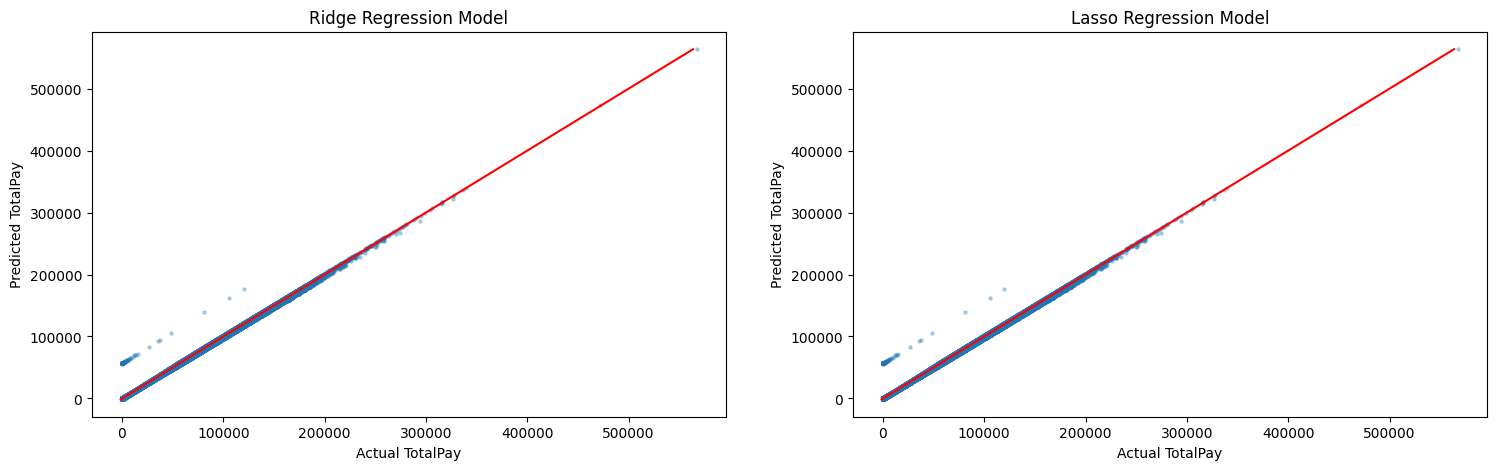

In [20]:
from sklearn.linear_model import Ridge, Lasso

# Create and train the model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Create and train the model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.3, s=5)
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.title('Ridge Regression Model')
plt.plot([y_pred_ridge.min(), y_pred_ridge.max()], [y_pred_ridge.min(), y_pred_ridge.max()], color='red')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.3, s=5)
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.title('Lasso Regression Model')
plt.plot([y_pred_lasso.min(), y_pred_lasso.max()], [y_pred_lasso.min(), y_pred_lasso.max()], color='red')

## Task 4. Show the performance of your models. You can use one or multiple metrics that you consider more suitable for your case (e.g. MAE, MSE, RMSE, etc.) and explain why you decided to use them. Make conclusions on the obtained results and the performance of each of the developed models.

- MAE (Mean Absolute Error) represents the average of the absolute differences between predictions and actual values
- MSE (Mean Squared Error) represents the average of the squared differences between predictions and actual values
- RMSE (Root Mean Squared Error) represents the square root of the average of the squared differences between predictions and actual values
- R2 Score (Coefficient of Determination) represents how well the model explains the variance of the target variable

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to evaluate models
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred) # R² Score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
    print(f"{name} Performance:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R² Score: {r2}\n")

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Linear Regression Performance:
  MAE: 1331.0626099149329
  MSE: 15249282.073035218
  RMSE: 3905.0329157428646
  R² Score: 0.9940285297006056

Ridge Regression Performance:
  MAE: 1331.0626099160118
  MSE: 15249282.073035233
  RMSE: 3905.0329157428664
  R² Score: 0.9940285297006056

Lasso Regression Performance:
  MAE: 1331.0624617508681
  MSE: 15249282.071393581
  RMSE: 3905.0329155326694
  R² Score: 0.9940285297012484



The errors of three regression models are nearly the same, because all of them are linear regression models. The target variable has a strong linear relationship with the independent variables, so the all the models make similar predictions.

## Task 5. Cluster your data and show a visual representation of it (you can use K-means, for example, or another algorithm you consider suitable).

Clustering is a technique used to group similar data points together. The objective is to divide the data into groups in such a way that:
1. Data points in the same group are as similar as possible
2. Data points in different groups are as different as possible

K-means is a clustering algorithm that aims to partition n observations into k clusters. It assigns each observation to the cluster with the nearest mean. Steps of the K-means algorithm:
1. Randomly initialize k cluster centroids (points)
2. assigns each data point to the nearest cluster centroid
3. recompute the cluster centroids as the mean of all the data points assigned to that cluster
4. repeat steps 2 and 3 until the cluster centroids do not change

In the section below, I used the following steps:
- Scaled the data using the `StandardScaler`; it transforms each feature so that it has a mean of 0 and a standard deviation of 1.
- Used Elbow Method to find the optimal number of clusters:
  - Calculates inertia (sum of squared distances between each data point and its nearest cluster centroid) for different numbers of clusters (k)
  - Plot the inertia values against k to create an Elbow Curve
- Perform K-Means clustering
- Visualize the clusters using a scatter plot


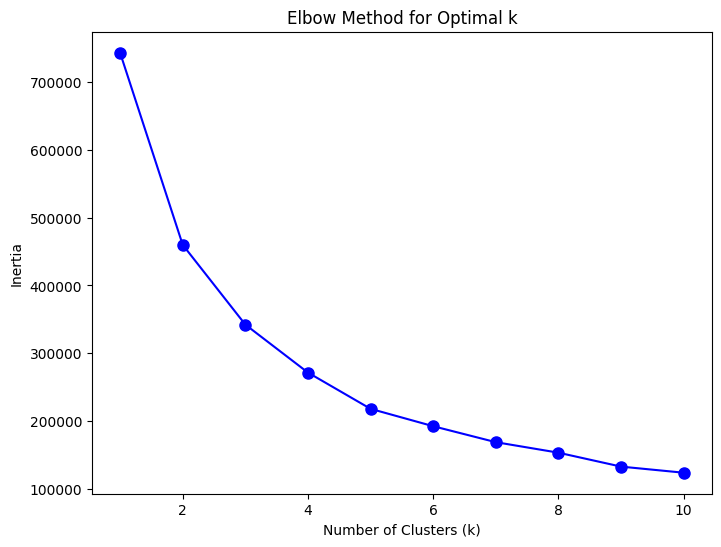

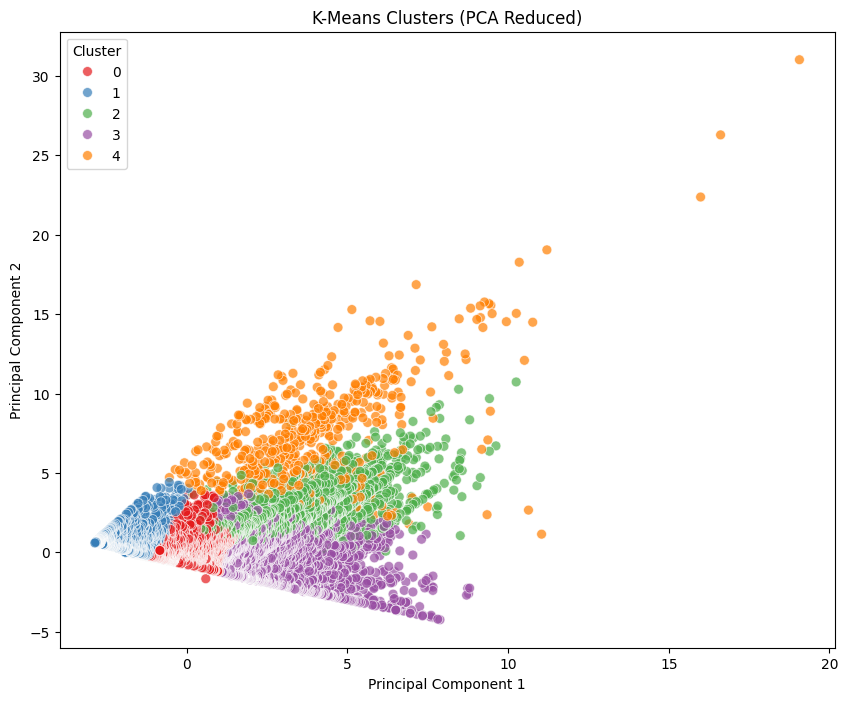

Cluster Analysis:
               BasePay   OvertimePay      OtherPay      Benefits  \
Cluster                                                            
0         68073.043533   3356.077517   2078.145709  27421.291249   
1         14847.982029    366.090022    945.503339   8377.763141   
2        102701.696509  42801.984048  11737.763919  35751.109606   
3        123209.145404   4802.487576   7270.001699  39245.262244   
4         72475.070690   9936.552523  90731.001993  22394.326721   

         TotalPayBenefits  
Cluster                    
0            93083.502565  
1            18251.474086  
2           188438.582884  
3           171226.042015  
4           187436.863949  

Cluster Sizes:
Cluster
0    70590
1    40282
3    28888
2     8347
4      547
Name: count, dtype: int64


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

clustering_features = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[clustering_features])

# Step 2: Determine the Optimal Number of Clusters (Elbow Method)
inertia = []
k_range = range(1, 11)  # Test 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 3: Perform K-Means Clustering
# Based on the Elbow Curve, choose the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: Visualize the Clusters
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=50, alpha=0.7)
plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Analyze the Clusters
# Calculate mean values for each cluster
cluster_analysis = df.groupby('Cluster')[clustering_features].mean()
print("Cluster Analysis:")
print(cluster_analysis)

# Check the size of each cluster
cluster_sizes = df['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)

## Task 6. Draw conclusions on the obtained clusters. Analyze the values predicted by your best Linear Regression model and resultant clusters.

From the obtained diagram, we can see that the data points are divided into 5 clusters. The lowest mean values of chosen features are in cluster 1, and the highest are in clusters 2 and 3.

Cluster 0 (Largest Cluster):
- Size: 70,590 records.
- Characteristics:
- Moderate BasePay (~68,073) and low OvertimePay (~3,356).
- Low OtherPay (~2,078) and moderate Benefits (~27,421).
- Total pay with benefits is relatively low (~93,083).
- Interpretation: Likely represents mid-tier employees with modest pay and limited overtime.

Cluster 1 (Smallest Cluster):
- Size: 547 records.
- Characteristics:
- Very low BasePay (~14,847) and negligible OvertimePay (~366).
- Minimal OtherPay (~945) and very low Benefits (~8,377).
- Total pay is extremely low (~18,251).
- Interpretation: Represents part-time or minimally compensated workers.

Cluster 2:
- Size: 28,888 records.
- Characteristics:
- High BasePay (~102,701) and significant OvertimePay (~42,801).
- Notable OtherPay (~11,737) and moderate Benefits (~35,751).
- Total pay is high (~188,438).
- Interpretation: Likely high-tier employees with substantial overtime and benefits.

Cluster 3:
- Size: 8,347 records.
- Characteristics:
- Very high BasePay (~123,209) and moderate OvertimePay (~4,802).
- Average OtherPay (~7,270) and higher Benefits (~39,245).
- Total pay is high (~171,226).
- Interpretation: Represents senior-level or experienced employees with high base pay and benefits.

Cluster 4:
- Size: 40,282 records.
- Characteristics:
- Low BasePay (~72,475) and moderate OvertimePay (~9,936).
- Very high OtherPay (~90,731) and low Benefits (~22,394).
- Total pay is high (~187,436).
- Interpretation: Likely includes employees earning significant OtherPay (e.g., commissions, bonuses) but relatively lower base salaries and benefits.

## Conclusion

In this laboratory work, I performed a detailed analysis of the dataset, including data visualization and pre-processing. I used linear regression models to predict the `TotalPay` variable and evaluated the performance of the models using different metrics. I also performed clustering on the data and analyzed the clusters obtained. The results show that the linear regression models perform well in predicting the target variable, and the clusters obtained provide valuable insights into the data.